In [35]:
import pickle
import pandas as pd
import numpy as np

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
dataset = pd.read_csv('C:\\Users\\Sakina\\Desktop\\UE - Data Science\\Machine Learning\\Assignments\\Mobile_Price_Prediction.csv', encoding='latin-1')

In [62]:
dataset = dataset.rename(columns=lambda x: x.strip().lower())

#dataset = dataset[dataset.columns[1:]] # Delete first column from dataset


#dataset['age'] = dataset['age'].fillna(np.mean(dataset['age']))

In [59]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [60]:
le = LabelEncoder() 
for i in dataset.columns:
    dataset[i] = le.fit_transform(dataset[i]) 

In [56]:
dataset

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,17,0,1,0,5,5,108,1,2,18,186,963,4,7,17,0,0,1,1
1,1,0,1,0,1,51,6,56,2,6,738,1099,998,12,3,5,1,1,0,2
2,1,0,1,2,1,39,8,65,4,6,962,901,984,6,2,7,1,1,0,2
3,1,20,0,0,0,8,7,51,5,9,935,954,1055,11,8,9,1,0,0,2
4,1,7,0,13,1,42,5,61,1,14,928,517,499,3,2,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,1,0,1,0,7,26,5,14,939,1022,180,8,4,17,1,1,0,0
1996,1,21,1,0,0,37,1,107,3,3,745,1080,732,6,10,14,1,1,1,2
1997,0,4,1,1,1,34,6,28,7,3,716,834,1158,4,1,3,1,1,0,3
1998,0,4,0,4,1,44,0,65,4,5,283,120,266,13,10,17,1,1,1,0


In [61]:
dataset.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011249,0.011308,-0.041538,0.033143,0.015355,-0.003986,0.033991,0.001777,-0.029682,...,0.010273,-0.008855,-0.000708,-0.029979,-0.021494,0.052380,0.011315,-0.010310,-0.008417,0.200248
blue,0.011249,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.005090,-0.041698,0.026061,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011308,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014384,-0.009274,0.003551,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041538,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.018290,0.014278,0.041111,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033143,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.012661,-0.005454,0.015194,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015355,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.021876,0.007510,0.006751,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.003986,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.002183,-0.008250,0.032887,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.033991,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.024935,0.023263,-0.009307,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001777,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.006518,0.000076,-0.002619,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029682,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.005171,0.024700,0.004662,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

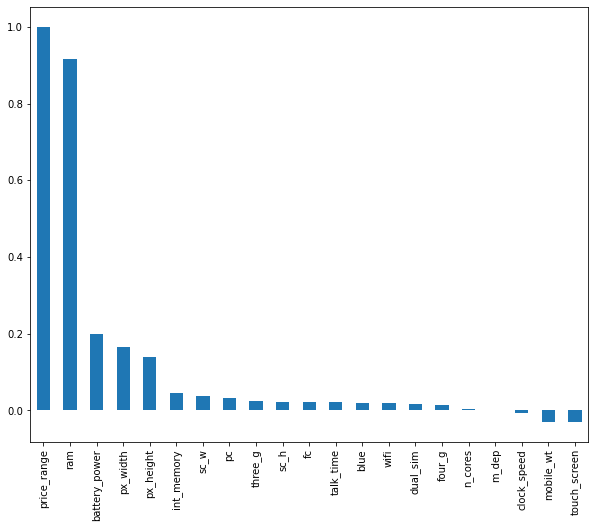

In [64]:
dataset.corrwith(dataset['price_range']).sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

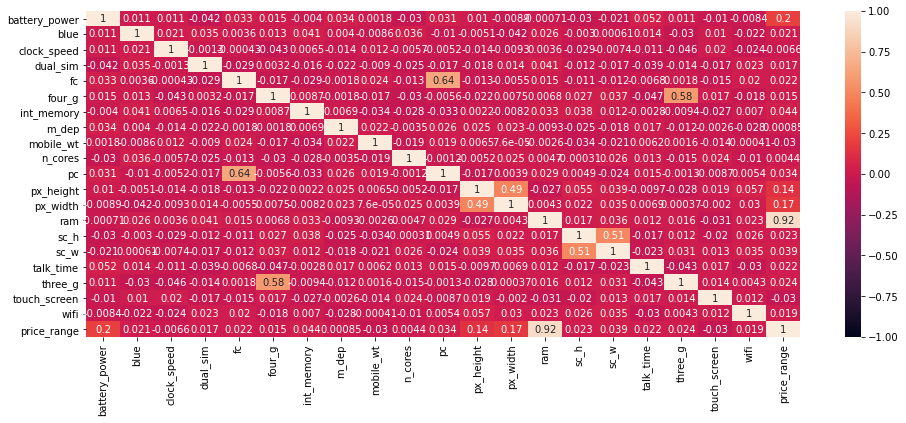

In [65]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [67]:
X = dataset.drop(['price_range'], axis=1) #we want to predict pclass from the given samples so exclude pclass from features
y = dataset['price_range'] #Make pclass as your output y vector

In [71]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

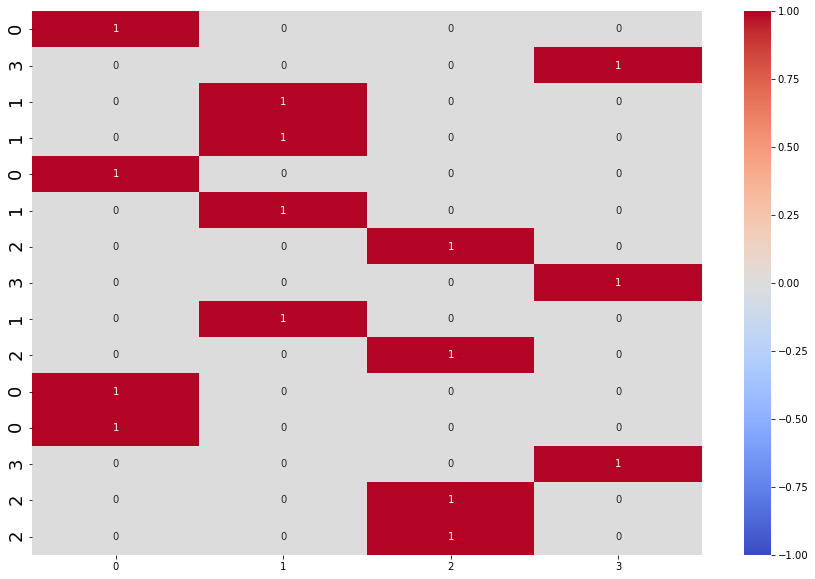

In [72]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(pd.DataFrame(y_predict_p)[:15], vmin=-1, vmax=1, annot=True,yticklabels=y_predict[:15],cmap='coolwarm')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.show()

In [87]:
dfg = pd.DataFrame(y_predict_p,columns='label1_p,label2_p, label3_p, label4_p'.split(','))
dfg['predicted_label']= y_predict
dfg['original_label']= list(y_test)
dfg.head(15)

,label1_p,label2_p,label3_p,label4_p,predicted_label,original_label
0,1.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,1.0,3,3
2,0.0,1.0,0.0,0.0,1,1
3,0.0,1.0,0.0,0.0,1,2
4,1.0,0.0,0.0,0.0,0,0
5,0.0,1.0,0.0,0.0,1,2
6,0.0,0.0,1.0,0.0,2,2
7,0.0,0.0,0.0,1.0,3,3
8,0.0,1.0,0.0,0.0,1,1
9,0.0,0.0,1.0,0.0,2,3


In [77]:
print(confusion_matrix(y_test,y_predict))
print()
print(classification_report(y_test,y_predict))

[[87  9  0  0]
 [11 79 15  0]
 [ 0 10 89 12]
 [ 0  1 18 69]]

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        96
           1       0.80      0.75      0.77       105
           2       0.73      0.80      0.76       111
           3       0.85      0.78      0.82        88

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [92]:
acc_entrop= []
acc_gini= []

for i in range(5,8):
    tr = tree.DecisionTreeClassifier(max_depth=i,criterion='entropy')
    tr.fit(X_train, y_train)
    pred_i = tr.predict(X_test)
    acc_entrop.append(accuracy_score(y_test,pred_i))
    
    tr1 = tree.DecisionTreeClassifier(max_depth=i,criterion='gini')
    tr1.fit(X_train, y_train)
    pred_i1 = tr1.predict(X_test)
    acc_gini.append(accuracy_score(y_test,pred_i1))

Text(0, 0.5, 'Accuracy')

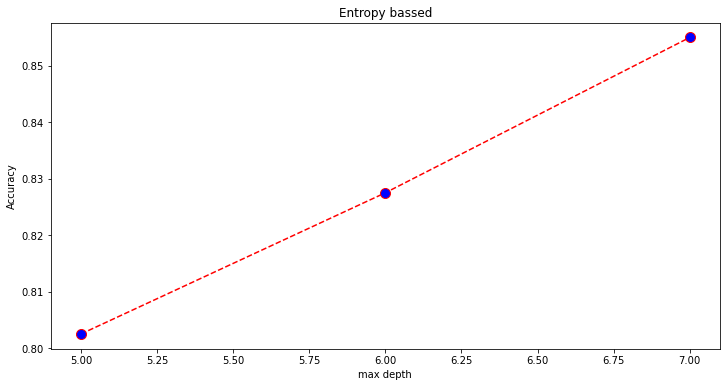

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(range(5,8), acc_entrop, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Entropy bassed')
plt.xlabel('max depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

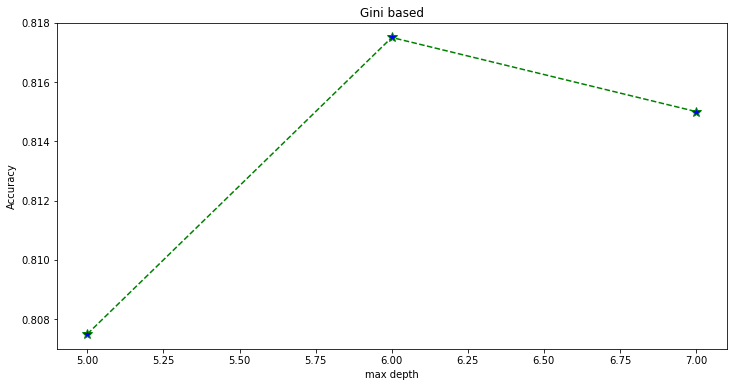

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(range(5,8), acc_gini, color='green', linestyle='dashed', marker='*',markerfacecolor='blue', markersize=10)
plt.title('Gini based')
plt.xlabel('max depth')
plt.ylabel('Accuracy')

In [95]:
text_representation = tree.export_text(treeModel)
print(text_representation)

|--- feature_13 <= 850.50
|   |--- feature_13 <= 391.50
|   |   |--- feature_11 <= 1033.50
|   |   |   |--- feature_13 <= 340.50
|   |   |   |   |--- feature_0 <= 951.00
|   |   |   |   |   |--- feature_6 <= 61.50
|   |   |   |   |   |   |--- feature_12 <= 756.00
|   |   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 838.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  838.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_12 >  756.00
|   |   |   |   |   |   |   |--- feature_12 <= 760.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_12 >  760.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 7.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1

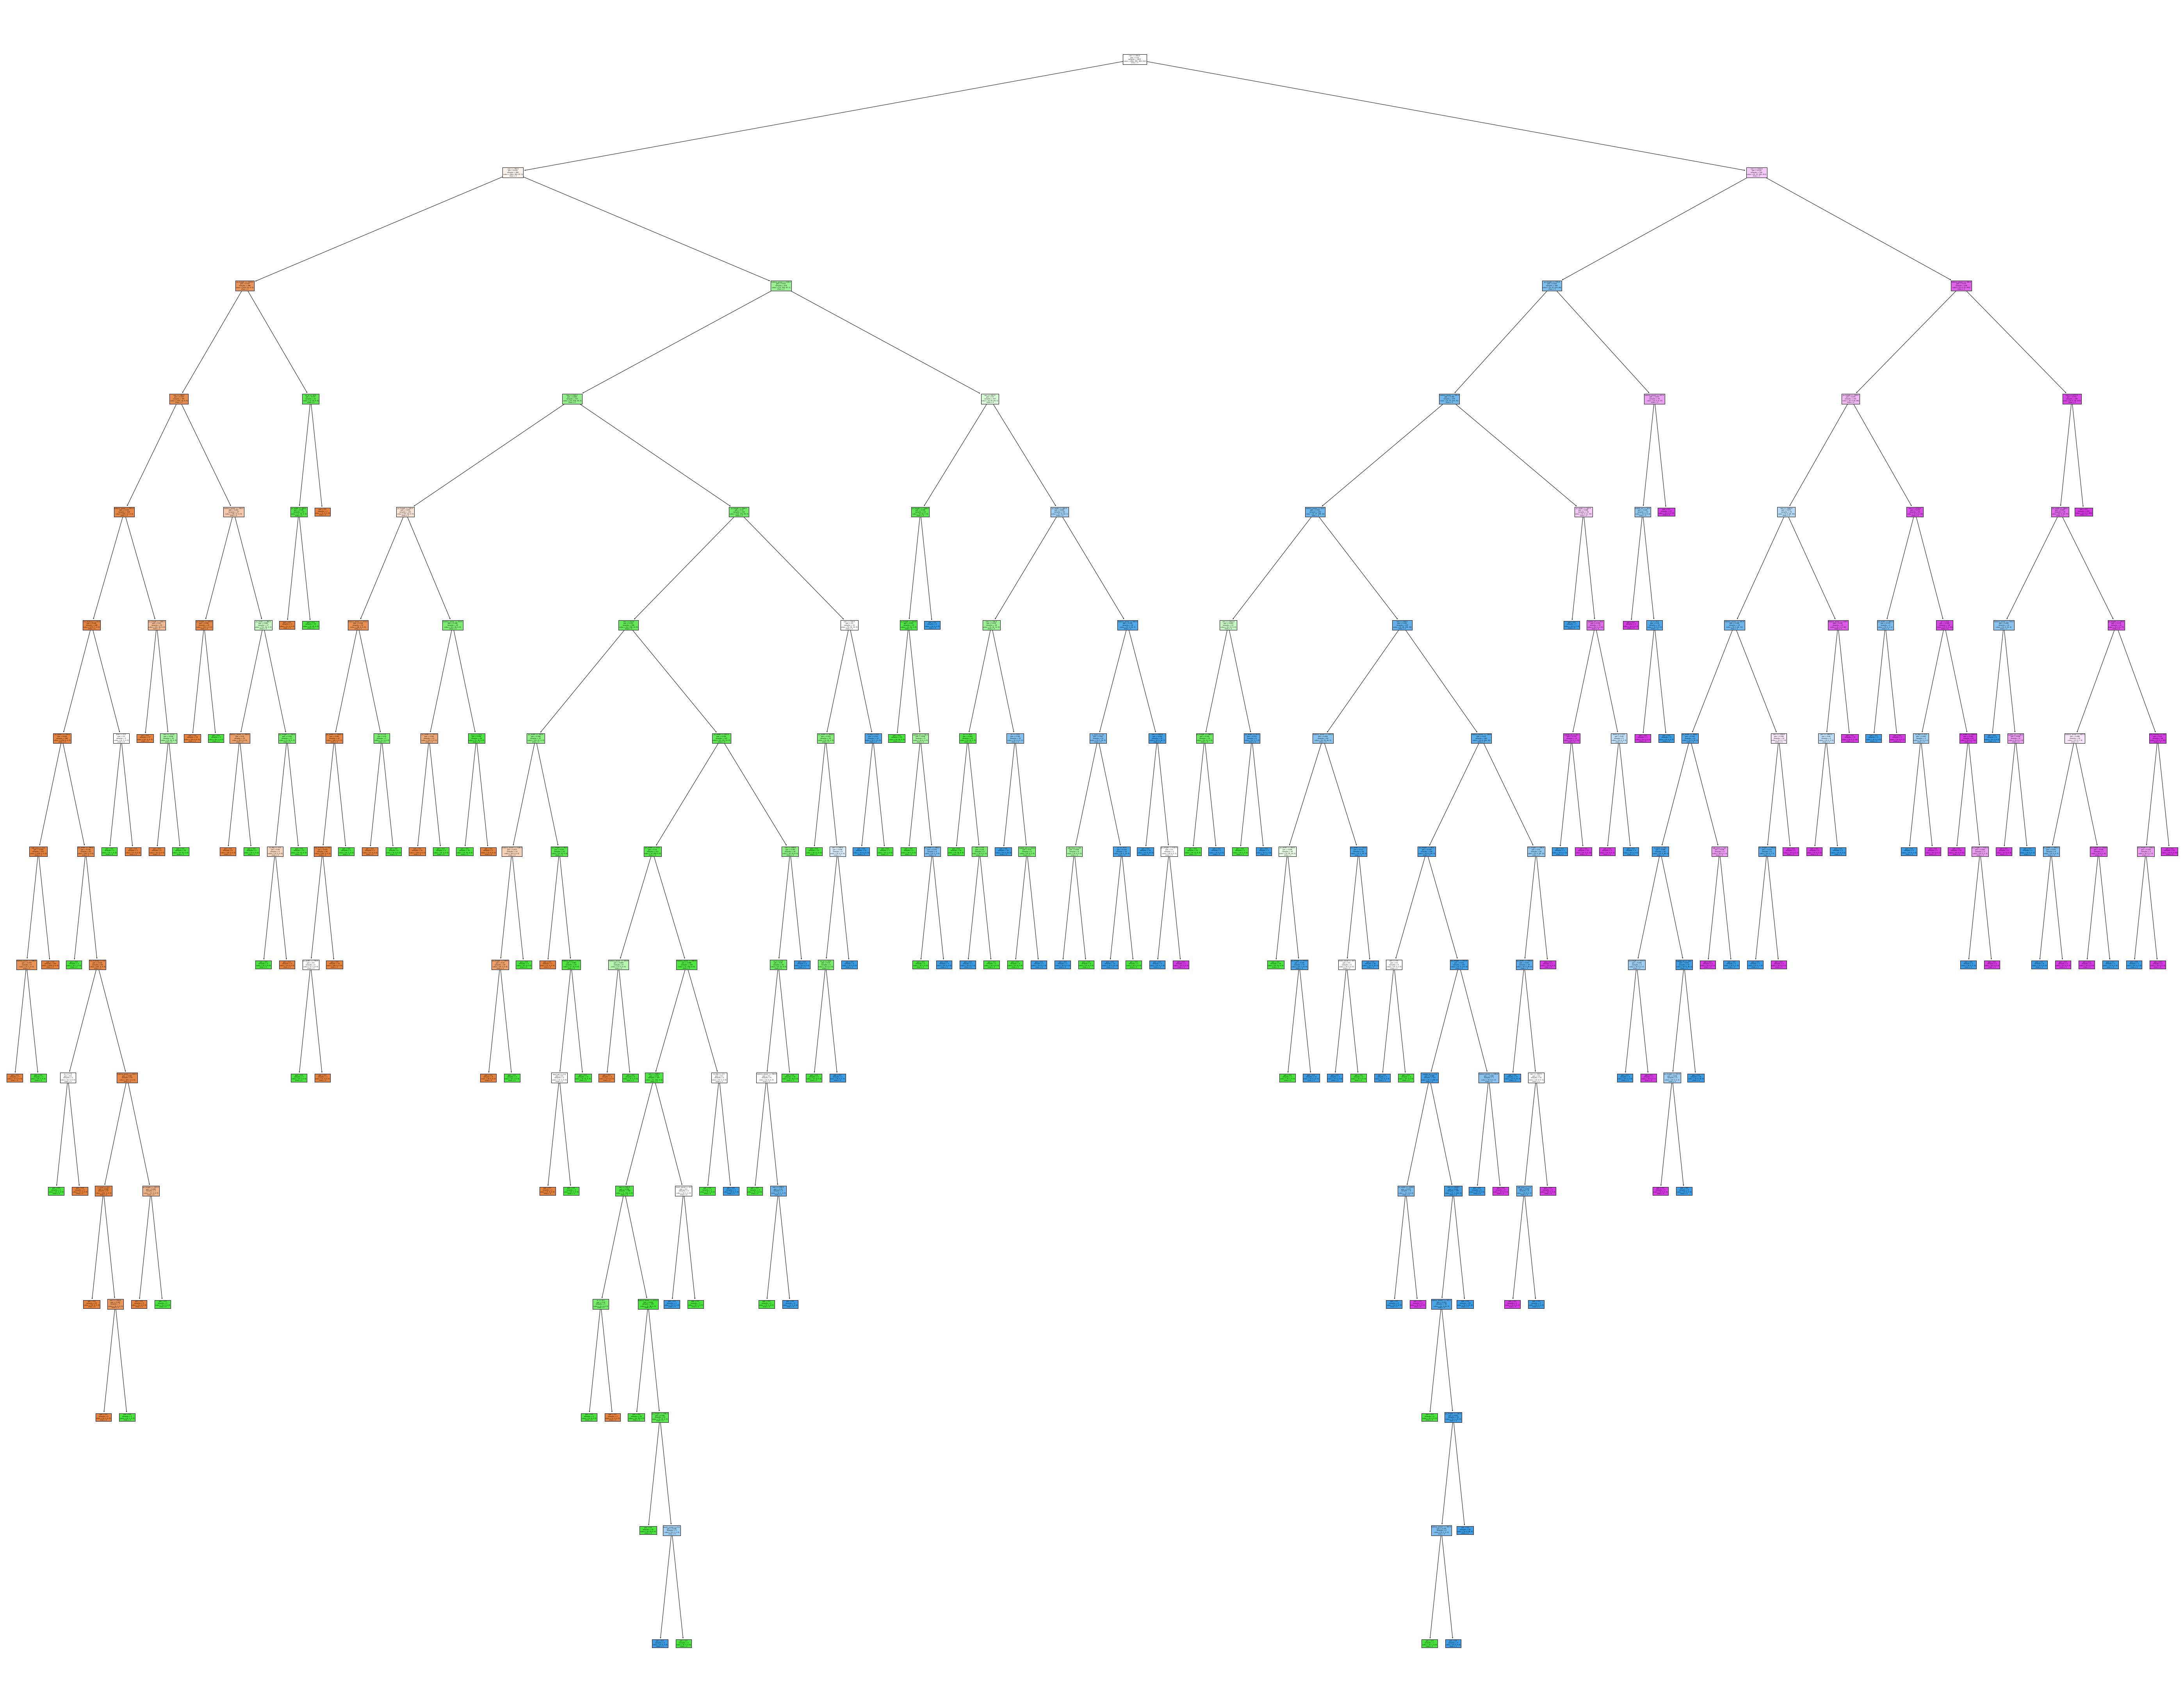

In [84]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(treeModel, 
                   feature_names=X.columns,  
                   class_names=[str(i) for i in y_train],
                   filled=True)

fig.savefig("decistion_tree.png")